In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report, confusion_matrix   
from sklearn.preprocessing import LabelEncoder   
import joblib

In [69]:
df_raw = pd.read_csv(r"C:\Users\Gracy Pauluse Ingle\Downloads\SQL_projects\telecom churn analysis\vw_churn_data.csv")

In [70]:
df_raw.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.6,593.30,0,0,382,974.81,Stayed,Other,Other
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.0,542.40,38,10,96,610.28,Stayed,Other,Other
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0,0,135,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.0,1237.85,0,0,362,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.9,267.40,0,0,22,289.54,Churned,Dissatisfaction,Network reliability


### Data Preprocessing

In [71]:
# Drop columns such as 'customer_id' that are irrelevant for the model
df = df_raw.drop(columns = ['Customer_ID','Churn_Reason','Churn_Category'], axis=1)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       6007 non-null   object 
 1   Age                          6007 non-null   int64  
 2   Married                      6007 non-null   object 
 3   State                        6007 non-null   object 
 4   Number_of_Referrals          6007 non-null   int64  
 5   Tenure_in_Months             6007 non-null   int64  
 6   Value_Deal                   2710 non-null   object 
 7   Phone_Service                6007 non-null   object 
 8   Multiple_Lines               6007 non-null   object 
 9   Internet_Service             6007 non-null   object 
 10  Internet_Type                4784 non-null   object 
 11  Online_Security              6007 non-null   object 
 12  Online_Backup                6007 non-null   object 
 13  Device_Protection_

In [73]:
df.describe()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6007.000000,6007.000000,6007.00000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000
mean,47.289163,7.439820,17.39454,65.087598,2430.986173,2.038455,7.015149,797.293158,3233.246021
std,16.805110,4.622369,10.59292,31.067808,2267.481294,8.068370,25.405737,854.868846,2856.181082
min,18.000000,0.000000,1.00000,-10.000000,19.100000,0.000000,0.000000,0.000000,21.610000
25%,33.000000,3.000000,8.00000,35.950000,539.950000,0.000000,0.000000,107.000000,833.685000
50%,47.000000,7.000000,17.00000,71.100000,1556.850000,0.000000,0.000000,470.000000,2367.150000
75%,60.000000,11.000000,27.00000,90.450000,4013.900000,0.000000,0.000000,1269.500000,5105.685000
max,84.000000,15.000000,36.00000,118.750000,8684.800000,50.000000,150.000000,3565.000000,11979.340000


In [74]:
columns_to_encoder = ['Gender', 'Age', 'Married', 'State', 'Number_of_Referrals',
       'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue']

In [75]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()


for column in columns_to_encoder:
    df[column] = label_encoder.fit_transform(df[column])
    

In [76]:
df.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,1,17,0,4,7,26,5,1,0,1,...,1,1,1,627,1420,0,0,376,1660,Stayed
1,0,27,1,12,14,12,5,1,1,1,...,0,0,1,6,1333,38,1,96,1183,Stayed
2,1,33,0,21,4,34,4,1,0,1,...,0,1,0,763,785,0,0,135,875,Churned
3,1,61,0,9,3,20,3,1,0,1,...,0,1,0,1212,2365,0,0,357,2334,Churned
4,0,62,0,17,3,7,5,1,0,1,...,0,1,1,949,749,0,0,22,664,Churned


In [77]:
df['Customer_Status'] = df['Customer_Status'].map({'Stayed' : 0, 'Churned' : 1})

In [78]:
df.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,1,17,0,4,7,26,5,1,0,1,...,1,1,1,627,1420,0,0,376,1660,0
1,0,27,1,12,14,12,5,1,1,1,...,0,0,1,6,1333,38,1,96,1183,0
2,1,33,0,21,4,34,4,1,0,1,...,0,1,0,763,785,0,0,135,875,1
3,1,61,0,9,3,20,3,1,0,1,...,0,1,0,1212,2365,0,0,357,2334,1
4,0,62,0,17,3,7,5,1,0,1,...,0,1,1,949,749,0,0,22,664,1


In [79]:
# Split data into features and target 
X = df.drop('Customer_Status', axis = 1) 
Y = df['Customer_Status']

In [80]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2 , random_state= 42)


In [81]:
# Train Random Forest Model
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state = 42)

# Train the model 
rf_model.fit(X_train , y_train)

RandomForestClassifier(random_state=42)

In [82]:
# evaluate model 
# make preduction
y_pred = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[786  55]
 [131 230]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       841
           1       0.81      0.64      0.71       361

    accuracy                           0.85      1202
   macro avg       0.83      0.79      0.80      1202
weighted avg       0.84      0.85      0.84      1202



In [90]:
# feature selection using feature importance 
importance = rf_model.feature_importances_
indices = np.argsort(importance)[::-1]

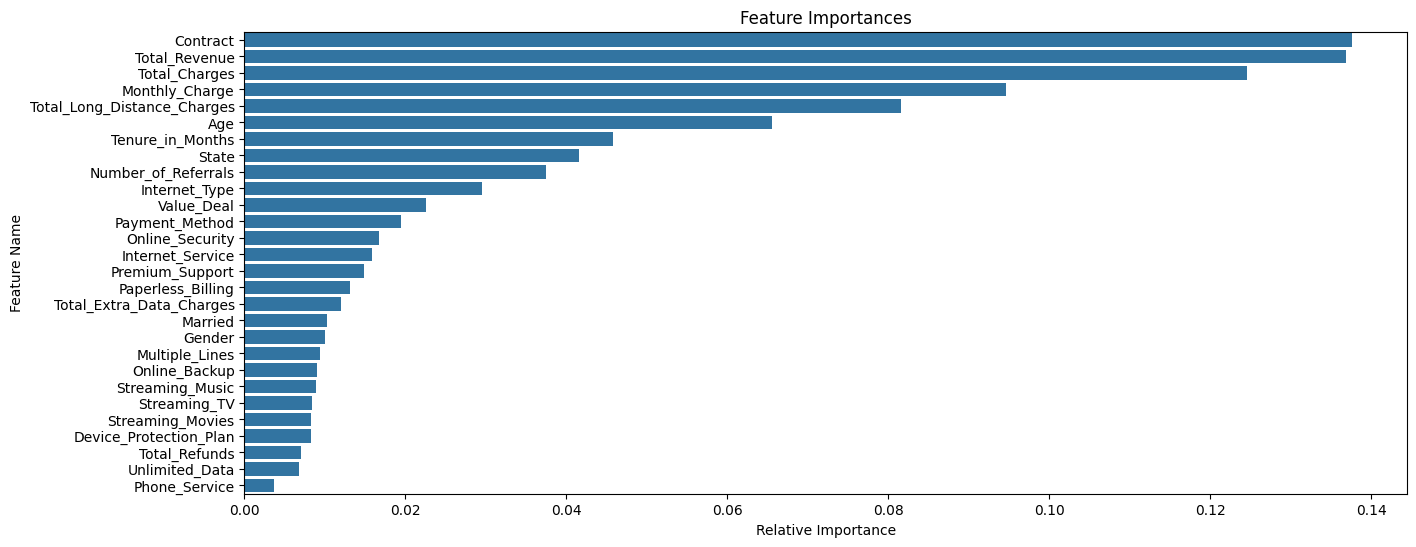

In [91]:
import matplotlib.pyplot as plt 
import seaborn as sns
# Plot the feature importances
plt.figure(figsize=(15,6))
sns.barplot(x=importance[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Name')
plt.show()

In [153]:
# Predict on New data set 
# import our CSV file for new_join 
new_df = pd.read_csv(r"C:\Users\Gracy Pauluse Ingle\Downloads\SQL_projects\telecom churn analysis\vw_join_data.csv")

In [154]:
# Keeping copy of original data
original_data = new_df.copy()

In [155]:
# Keeping the copy of customer_id
customer_id = new_df['Customer_ID']

In [156]:
# Drop columns which are not requiered for are model
new_df = new_df.drop(columns = ['Customer_ID','Customer_Status','Churn_Reason','Churn_Category'], axis=1)

In [157]:
# encoding the categorical variable using the saved Label encoders

for column in new_df.select_dtypes(include=['object']).columns:
    new_df[column] = label_encoder.fit_transform(new_df[column])

In [158]:
# make predictions from new_data the is not know to are model
new_predictions = rf_model.predict(new_df)

In [159]:
# add predictions to our orginal dataframe
original_data['Customer_Status_Predictions'] = new_predictions

In [160]:
original_data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Customer_Status_Predictions
0,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,...,72.10,72.1,0,0,8,79.87,Joined,Other,Other,1
1,57256-BIH,Female,18,No,Bihar,9,7,NaN,Yes,No,...,19.85,57.2,0,0,9,66.56,Joined,Other,Other,1
2,72357-MAD,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,...,44.30,44.3,0,0,43,87.25,Joined,Other,Other,1
3,66612-KAR,Female,58,Yes,Karnataka,11,18,NaN,Yes,No,...,19.95,58.0,0,0,8,66.07,Joined,Other,Other,1
4,22119-WES,Male,31,Yes,West Bengal,5,5,NaN,Yes,No,...,20.05,33.7,0,0,4,37.32,Joined,Other,Other,1


In [161]:
# New filtering df that include only churn which is predicted by are model
original_data = original_data[original_data['Customer_Status_Predictions'] == 1]

In [163]:
# Saving the file to CSV and we will user this file to show future customer who can possibly churn 
original_data.to_csv('Future_Customer_Churn.csv')